## Processing Landsat Imagery for our CNN

You'll likely want to add some more Landsat 8 Imagery as you progress

Find path and row of interest here: https://landsatlook.usgs.gov/viewer.html and make sure it generally overlaps with out labeled dataset.

Now you can go download Analysis Ready Data here by putting in the path and row, a date set, and then make sure you click on Analysis Ready Data (ARD) from the datasets: https://earthexplorer.usgs.gov/. Just make sure it is Landsat 8 and we want it to generally be from July-October and from 2013-2015.

When you find an image you want you need to make and account, login, and just click download. You only need the Surface Reflectance bands.

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# check where the data is located
! ls /deep_data/

LC08_CU_027012_20170907_20181121_C01_V01_SR
LC08_CU_028011_20170907_20181130_C01_V01_SR
LC08_CU_028012_20140814_20171017_C01_V01_SR
LC08_CU_028012_20171002_20171019_C01_V01_SR
data
landcover_reproject.tif
processed_landsat
sc_2010_ccap_land_cover_20140604.img
sentinel_sar
va_2010_ccap_land_cover.img


In [3]:
import os # we need os to do some basic file operations

# this is the location of our files for this specific landsat SR (surface reflectance) image
ls8_fp = "/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/"

In [4]:
! ls /deep_data/LC08_CU_028012_20140814_20171017_C01_V01_SR/

LC08_CU_028012_20140814_20171017_C01_V01.xml
LC08_CU_028012_20140814_20171017_C01_V01_LINEAGEQA.tif
LC08_CU_028012_20140814_20171017_C01_V01_PIXELQA.tif
LC08_CU_028012_20140814_20171017_C01_V01_RADSATQA.tif
LC08_CU_028012_20140814_20171017_C01_V01_SRAEROSOLQA.tif
LC08_CU_028012_20140814_20171017_C01_V01_SRB1.tif
LC08_CU_028012_20140814_20171017_C01_V01_SRB2.tif
LC08_CU_028012_20140814_20171017_C01_V01_SRB3.tif
LC08_CU_028012_20140814_20171017_C01_V01_SRB4.tif
LC08_CU_028012_20140814_20171017_C01_V01_SRB5.tif
LC08_CU_028012_20140814_20171017_C01_V01_SRB6.tif
LC08_CU_028012_20140814_20171017_C01_V01_SRB7.tif
combined.tif


In [22]:
from glob import glob
# this finds all files that have SRB at the end which stands for Surface Reflectance Band and then will have the band number
ls8_band_paths = glob(ls8_fp + '*SRB*')

In [23]:
# we want to make sure the bands are in the same order so all the final images look the same
ls8_band_paths.sort()
ls8_band_paths += glob(ls8_fp + '*PIXELQA*') # add the pixel QA band
ls8_band_paths

['/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_SRB1.tif',
 '/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_SRB2.tif',
 '/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_SRB3.tif',
 '/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_SRB4.tif',
 '/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_SRB5.tif',
 '/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_SRB6.tif',
 '/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_SRB7.tif',
 '/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_PIXELQA.tif']

In [24]:
ls8_fp.split('/')[-2]

'LC08_CU_028012_20171002_20171019_C01_V01_SR'

In [25]:
# filepath for image we're writing out
img_fp = '/deep_data/processed_landsat/' + ls8_fp.split('/')[-2] + '_combined.tif'

# Read metadata of first file and assume all other bands are the same
with rasterio.open(ls8_band_paths[0]) as src0:
    meta = src0.meta

# Update metadata to reflect the number of layers
meta.update(count = len(ls8_band_paths))


# Read each layer and write it to stack
with rasterio.open(img_fp, 'w', **meta) as dst:
    for id, layer in enumerate(ls8_band_paths, start=1):
        print(layer)
        if id < 8:
            with rasterio.open(layer) as src1:
                dst.write_band(id, src1.read(1))
        else:
            with rasterio.open(layer) as src1:
                dst.write_band(id, src1.read(1).astype(np.int16)) # this one otherwise is uint16 for some reason

/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_SRB1.tif
/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_SRB2.tif
/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_SRB3.tif
/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_SRB4.tif
/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_SRB5.tif
/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_SRB6.tif
/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_SRB7.tif
/deep_data/LC08_CU_028012_20171002_20171019_C01_V01_SR/LC08_CU_027012_20170907_20181121_C01_V01_PIXELQA.tif


In [26]:
img_fp

'/deep_data/processed_landsat/LC08_CU_028012_20171002_20171019_C01_V01_SR_combined.tif'

In [27]:
full_dataset = rasterio.open(img_fp)
print(full_dataset.shape) # dimensions
print(full_dataset.count) # bands

(5000, 5000)
8


Looks good!

In [28]:
# looking into pixel quality
# read more here https://prd-wret.s3-us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/atoms/files/LSDS-1873_US_Landsat_ARD_DFCB_0.pdf
pixel_qa_image = full_dataset.read(8)
print(pixel_qa_image.shape) # dimensions
print(np.unique(pixel_qa_image))

(5000, 5000)
[  1 322 324 328 352 386 392 416 480 834 840 864 898 904 928 992]


In [29]:
full_dataset.close()

### Now let's download and process the SAR data

In [4]:
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox, DataSource

# first we need all the landsat files we want to match

l8_image_paths = ['/deep_data/processed_landsat/LC08_CU_027012_20170907_20181121_C01_V01_SR_combined.tif',
               '/deep_data/processed_landsat/LC08_CU_028011_20170907_20181130_C01_V01_SR_combined.tif',  
               '/deep_data/processed_landsat/LC08_CU_028012_20171002_20171019_C01_V01_SR_combined.tif']

Now we need to choose which landsat image we want

In [5]:
l8_filename = l8_image_paths[0]
image_dataset = rasterio.open(l8_filename)

Now we need to get the bounding coordinated of the landsat image in the appropriate CRS

In [6]:
from pyproj import Proj, transform
# this will get our four corner points
raster_utm_points = image_dataset.transform * (0, 0), image_dataset.transform * (image_dataset.width, 0), image_dataset.transform * (image_dataset.width, image_dataset.height), image_dataset.transform * (0, image_dataset.height)

# Project all longitudes, latitudes using the pyproj package
p1 = Proj(image_dataset.crs) # our current crs
p2 = Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs ") # the crs we want our raster to be in

# use the pyproj.transform function to convert the positions to longs, lats
lats, longs = transform(p1, p2, np.array(raster_utm_points)[:,0],np.array(raster_utm_points)[:,1])

raster_gps_points = list(zip(lats, longs)) # zip up the points so they're in the form [(lat, long), ...]

print('raster bounds in UTM 18N:\n', raster_utm_points, '\n')
print('raster bounds in lat, lon:\n', raster_gps_points)

raster bounds in UTM 18N:
 ((1484415.0, 1514805.0), (1634415.0, 1514805.0), (1634415.0, 1364805.0), (1484415.0, 1364805.0)) 

raster bounds in lat, lon:
 [(-79.40507192506966, 35.51886361214416), (-77.7671965255445, 35.27465758044477), (-78.07896077506945, 33.957621537811946), (-79.69000760805608, 34.198029812561515)]


Close the dataset to clean up

In [7]:
raster_gps_reversed = list(zip(np.array(raster_gps_points)[:,1], np.array(raster_gps_points)[:,0]))

max_lat = round(np.amax(np.array(raster_gps_reversed)[:,0]), 5)
min_lat = round(np.amin(np.array(raster_gps_reversed)[:,0]), 5)

max_long = round(np.amax(np.array(raster_gps_reversed)[:,1]), 5)
min_long = round(np.amin(np.array(raster_gps_reversed)[:,1]), 5)

landsat8_coords_wgs84 = [min_long,min_lat, max_long, max_lat]

landsat8_bbox = BBox(bbox=landsat8_coords_wgs84, crs=CRS.WGS84)

landsat8_bbox.geojson

{'coordinates': (((-79.69001, 33.95762),
   (-79.69001, 35.51886),
   (-77.7672, 35.51886),
   (-77.7672, 33.95762),
   (-79.69001, 33.95762)),),
 'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'type': 'Polygon'}

In [8]:
image_dataset.close()

Get the date from the landsat file name

In [9]:
import datetime

landsat_date = l8_filename.split('/')[-1].split('_')[3]
print(landsat_date)

date = datetime.datetime.strptime(landsat_date, '%Y%m%d')
end_date = date + datetime.timedelta(days=7)
start_date = date - datetime.timedelta(days=7)
print(date.strftime('%Y-%m-%d'))
print(end_date.strftime('%Y-%m-%d'))
print(start_date.strftime('%Y-%m-%d'))

20170907
2017-09-07
2017-09-14
2017-08-31


Util function for showing SAR images

In [10]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
    
    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

### Downloading and Processing Data from Sentinel Hub

In order to use Sentinel Hub services you will need a Sentinel Hub account. If you do not have one yet, you can create a free trial account at [Sentinel Hub webpage](https://services.sentinel-hub.com/oauth/subscription). If you are a researcher you can even apply for a free non-commercial account at [ESA OSEO page](https://earth.esa.int/aos/OSEO).

Once you have the account set up, login to [Sentinel Hub Configurator](https://apps.sentinel-hub.com/configurator/). Inside there will already exist one configuration with an **instance ID** (alpha-numeric code of length 36). For this tutorial it is recommended that you create a new configuration (`"Add new configuration"`) and set the configuration to be based on **Python scripts template**. Such configuration will already contain all layers used in these examples. Otherwise you will have to define the layers for your  configuration yourself.

After you have decided which configuration to use, you have two options. You can either put configuration's **instance ID** into `sentinelhub` package's configuration file following the [configuration instructions](http://sentinelhub-py.readthedocs.io/en/latest/configure.html) or you can write it down in the following cell:

In [11]:
INSTANCE_ID = '6a0eba64-c94f-495b-bb32-5e9122bf4318'  # In case you put instance ID into configuration file you can leave this unchanged

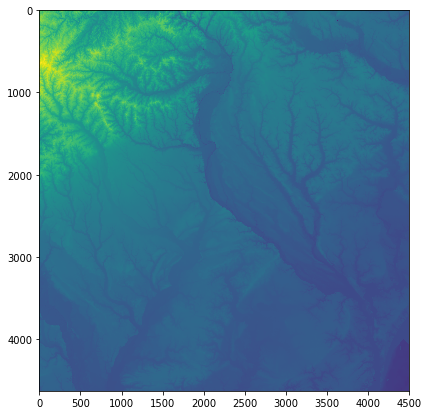

In [17]:
from sentinelhub import CustomUrlParam

dem_data_path = '/deep_data/sentinel_sar/' + l8_filename.split('/')[-1].split('.')[0] + '_dem'


dem_request = WmsRequest(data_folder=dem_data_path,
                        data_source=DataSource.DEM,
                         layer='DEM',
                         bbox=landsat8_bbox,
                         width=4500,
                         instance_id=INSTANCE_ID,
                         image_format=MimeType.TIFF_d32f,
                         custom_url_params={CustomUrlParam.SHOWLOGO: False})

dem_image = dem_request.get_data(save_data=True)[0]

plot_image(dem_image, 1 / np.amax(dem_image))

In [37]:
dem_path = dem_data_path + '/wms_DEM_EPSG4326_-79.69001_33.95762_-77.7672_35.51886__4500X4631_ShowLogo_False_tiff_depth=32f.tiff'

# Open our raster dataset
label_dataset = rasterio.open(dem_path)
label_image = label_dataset.read()

# How many bands does this image have?
num_bands = label_dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = label_dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# What driver was used to open the raster?
driver = label_dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = label_dataset.crs
print('Image projection:')
print(proj)

Number of bands in image: 1

Image size is: 4631 rows x 4500 columns

Raster driver: GTiff

Image projection:
EPSG:4326


In [20]:
gt = label_dataset.transform
print(gt)

| 0.00, 0.00,-79.69|
| 0.00,-0.00, 35.52|
| 0.00, 0.00, 1.00|


In [21]:
pixelSizeX = gt[0]
pixelSizeY =-gt[4]

print(pixelSizeX)
print(pixelSizeY)

0.00042729111111111076
0.0003371280500971708


In [40]:
data_path = '/deep_data/sentinel_sar/' + l8_filename.split('/')[-1].split('.')[0]

s1_request = WmsRequest(data_folder=data_path,
                         data_source=DataSource.SENTINEL1_IW,
                         layer='BANDS-S1-IW',
                         bbox=landsat8_bbox,
                         time=(start_date, end_date),
                         width=3500,
                         image_format=MimeType.TIFF_d32f,
                         instance_id=INSTANCE_ID)

s1_data = s1_request.get_data(save_data=True)
# s1_data = s1_request.save_data() # could save directly to file
len(s1_data)

6

In [41]:
np.array(s1_data).shape

(6, 3602, 3500, 2)

In [42]:
from glob import glob
# this finds all files that have SRB at the end which stands for Surface Reflectance Band and then will have the band number
sent1_band_paths = glob(data_path + '/*tiff*')
sent1_band_paths.sort()
sent1_band_paths

['/deep_data/sentinel_sar/LC08_CU_027012_20170907_20181121_C01_V01_SR_combined/wms_BANDS-S1-IW_EPSG4326_-79.69001_33.95762_-77.7672_35.51886_2017-08-31T23-13-43_3500X3602_tiff_depth=32f.tiff',
 '/deep_data/sentinel_sar/LC08_CU_027012_20170907_20181121_C01_V01_SR_combined/wms_BANDS-S1-IW_EPSG4326_-79.69001_33.95762_-77.7672_35.51886_2017-08-31T23-14-08_3500X3602_tiff_depth=32f.tiff',
 '/deep_data/sentinel_sar/LC08_CU_027012_20170907_20181121_C01_V01_SR_combined/wms_BANDS-S1-IW_EPSG4326_-79.69001_33.95762_-77.7672_35.51886_2017-09-05T23-21-58_3500X3602_tiff_depth=32f.tiff',
 '/deep_data/sentinel_sar/LC08_CU_027012_20170907_20181121_C01_V01_SR_combined/wms_BANDS-S1-IW_EPSG4326_-79.69001_33.95762_-77.7672_35.51886_2017-09-05T23-22-23_3500X3602_tiff_depth=32f.tiff',
 '/deep_data/sentinel_sar/LC08_CU_027012_20170907_20181121_C01_V01_SR_combined/wms_BANDS-S1-IW_EPSG4326_-79.69001_33.95762_-77.7672_35.51886_2017-09-12T23-13-43_3500X3602_tiff_depth=32f.tiff',
 '/deep_data/sentinel_sar/LC08_CU_0

In [43]:
sar_images = []
for fp in sent1_band_paths:
    dataset = rasterio.open(fp)
    sar_images.append(dataset.read())
    dataset.close()
    
sar_images = np.array(sar_images)

In [44]:
len(sar_images)

6

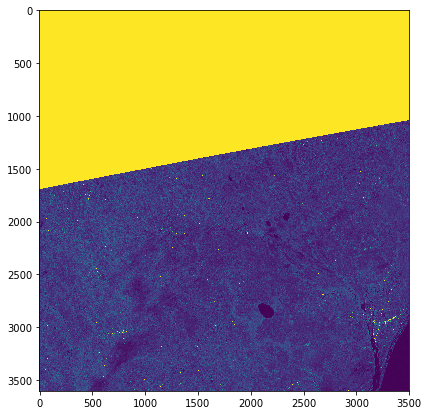

In [45]:
plot_image(sar_images[0,0,:,:])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


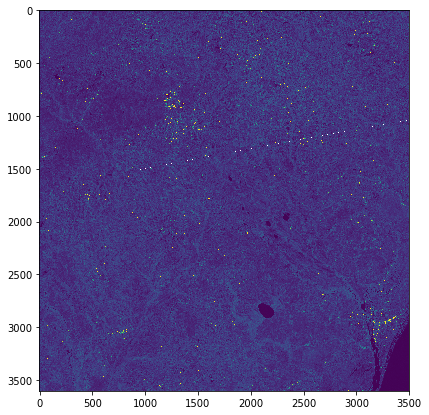

In [46]:
sar_images[sar_images==1.0]=np.nan
average_image = np.nanmean(sar_images, axis=0)

plot_image(average_image[0])

In [47]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

# TODO this interpolation method really should be 2D and should not try to interpolate when the closest 
# non-NAN value is greater than ~3 pixels away
nans, x = nan_helper(average_image)
average_image[nans] = np.interp(x(nans), x(~nans), average_image[~nans])

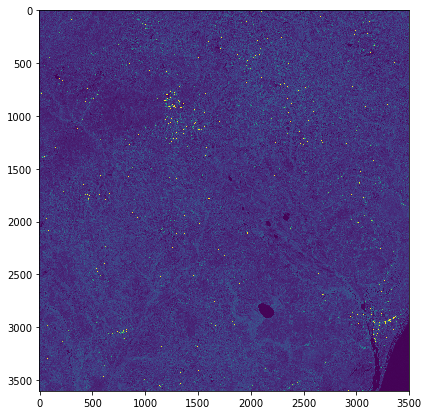

In [48]:
plot_image(average_image[0])

In [49]:
sent1_fn = data_path + '/' + l8_filename.split('/')[-1].split('.')[0] + '_SAR.tif'
# Register GDAL format drivers and configuration options with a
# context manager.
with rasterio.Env():

    # Write an array as a raster band to a new 8-bit file. For
    # the new file's profile, we start with the profile of the source
    # Read metadata of first file and assume all other bands are the same
    with rasterio.open(sent1_band_paths[0]) as src0:
        meta = src0.meta

    with rasterio.open(sent1_fn, 'w', **meta) as dst:
        dst.write(average_image, [1,2])

# At the end of the ``with rasterio.Env()`` block, context
# manager exits and all drivers are de-registered.

In [50]:
image_dataset.close()

In [52]:
import os

import affine

import rasterio
from rasterio.crs import CRS
from rasterio.enums import Resampling
from rasterio import shutil as rio_shutil
from rasterio.vrt import WarpedVRT

input_files = (
    dem_path,
    sent1_fn
)

image_dataset = rasterio.open(l8_filename)

# Destination CRS is same as landsat which is UTM 18N for NC
dst_crs = image_dataset.crs

# These coordiantes are in UTM 18N for NC
dst_bounds = image_dataset.bounds

# Output image dimensions
dst_height, dst_width = image_dataset.shape

# Output image transform
left, bottom, right, top = dst_bounds
xres = (right - left) / dst_width
yres = (top - bottom) / dst_height
dst_transform = affine.Affine(xres, 0.0, left,
                              0.0, -yres, top)



In [53]:
vrt_options = {
    'resampling': Resampling.cubic,
    'crs': dst_crs,
    'transform': dst_transform,
    'height': dst_height,
    'width': dst_width,
}

for path in input_files:
    with rasterio.open(path) as src:

        with WarpedVRT(src, **vrt_options) as vrt:

            # At this point 'vrt' is a full dataset with dimensions,
            # CRS, and spatial extent matching 'vrt_options'.

            # Read all data into memory.
            data = vrt.read()

            # Dump the aligned data into a new file.  A VRT representing
            # this transformation can also be produced by switching
            # to the VRT driver.
            directory, name = os.path.split(path)
            outfile = os.path.join(directory, 'aligned-{}'.format(name))
            rio_shutil.copy(vrt, outfile, driver='GTiff')